<a href="https://colab.research.google.com/github/ataulhaque/ML/blob/main/imdb_movie_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the imdb_movie_data.csv file
from google.colab import files
uploaded = files.upload()


Saving IMDB-Movie-Data.csv to IMDB-Movie-Data.csv


In [2]:
#import the required libraries
import pandas as pd


In [3]:
#load the csv file using pandas to create a dataframe of the loaded data
imdb_movie_sample = pd.read_csv('IMDB-Movie-Data.csv')
imdb_movie_sample.shape
imdb_movie_sample.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
#Select a single feature and target variable
X = imdb_movie_sample[['Votes']]
y = imdb_movie_sample['Rating']

#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train and use the model**

Mean Squared Error: 0.7636213680302952
R-squared: 0.20336944843505966


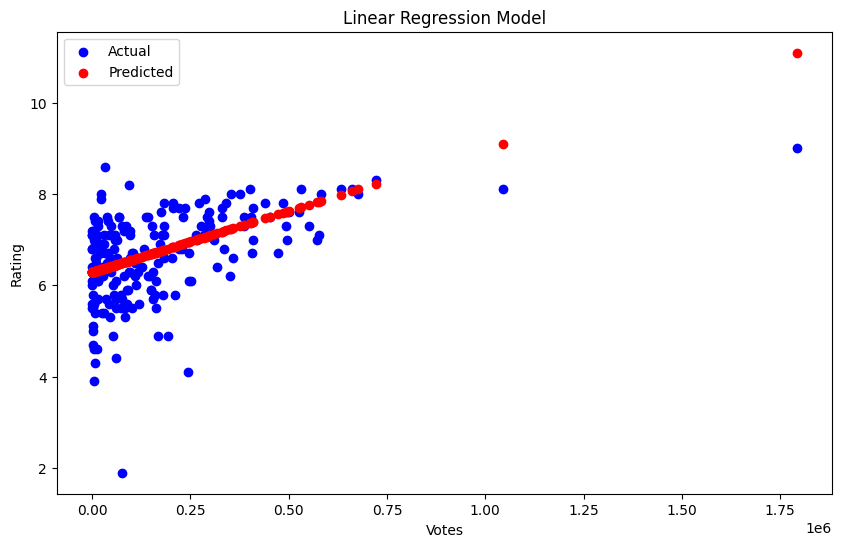

In [5]:
#Create and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

#Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

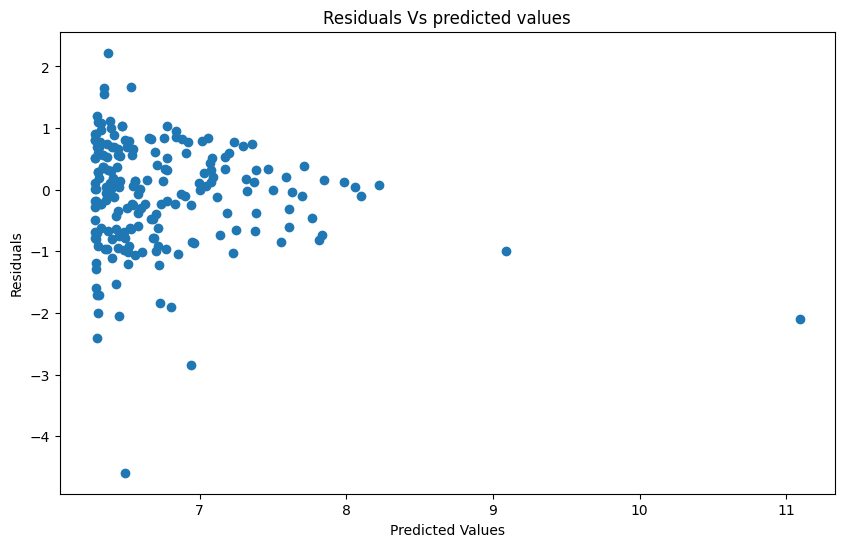

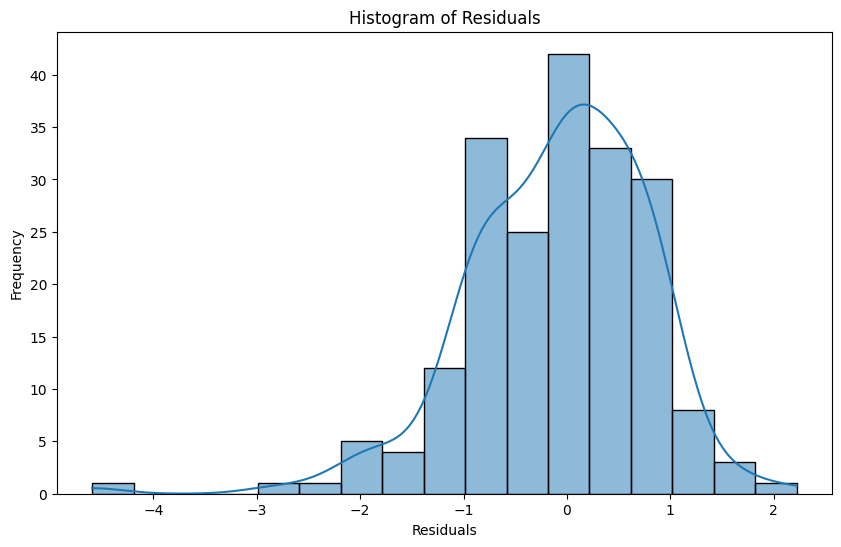

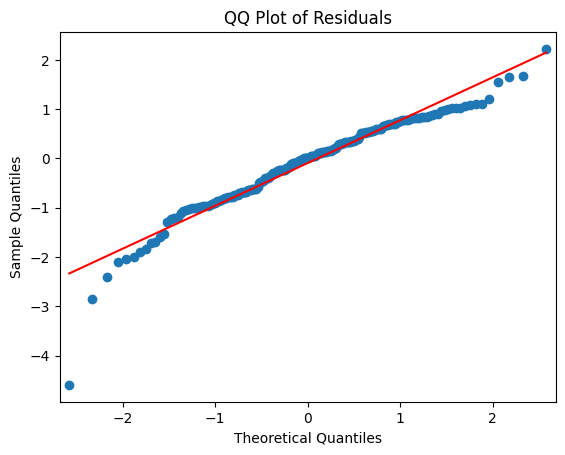

In [6]:
#check for homoscedasticity
import statsmodels.api as sm
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Vs predicted values')
plt.show()

#Check for Normality of residuals
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

#quantiles
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()